`Package Description`

**yt-dlp** : Downloads the YouTube video's audio and saves it as a .wav file.

**ffmpeg** : Helps in extracting and converting the audio to the desired format.

**pyannote.audio** : Analyzes the audio file to identify speakers and their speaking intervals.

**torch** : Ensures the diarization process runs on the most efficient hardware (GPU or CPU).

 **os** : Manages file paths and directories for saving outputs.

In [ ]:
!pip install yt-dlp pyannote.audio numpy openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 13.3 MB/s eta 0:00:00


In [ ]:
!apt update && apt install -y ffmpeg

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,683 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-up

In [ ]:
!apt update && apt install -y libnccl2 libnccl-dev

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
37 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
from pyannote.audio import Pipeline
import yt_dlp
import torch

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def download_youtube_audio(url, output_path):
    print("Downloading audio...")

    if not os.path.exists(output_path):
        os.makedirs(output_path)



    audio_path = os.path.join(output_path, "audio.wav")

    ydl_opts = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
        }],
        'outtmpl': os.path.join(output_path, "audio"),  # yt-dlp will add .wav extension

    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print("Downloading audio...")
            ydl.download([url])
            print("Audio downloaded successfully.")
            return True, audio_path
    except Exception as e:
        print(f"Failed to download audio: {e}")
        return False, None

def diarize_audio(audio_path, output_path):
    print("Performing diarization...")

    pipeline = Pipeline.from_pretrained(
        "pyannote/speaker-diarization-3.1",

    )
    pipeline.to(device)

    diarization = pipeline(audio_path)

    # Save RTTM file
    diarization_output = os.path.join(output_path, "diarization.rttm")
    with open(diarization_output, "w") as f:
        diarization.write_rttm(f)

    print(f"Diarization completed. Results saved to {diarization_output}")

def main():
    youtube_url = "https://www.youtube.com/watch?v=j9EV5ffSn0M"
    output_dir = "./output"

    # Step 1: Download YouTube audio
    success, audio_path = download_youtube_audio(youtube_url, output_dir)
    if not success or audio_path is None:
        print("Failed to download or process YouTube audio.")
        return

    # Step 2: Diarize the downloaded audio
    if os.path.exists(audio_path):
        diarize_audio(audio_path, output_dir)
    else:
        print(f"Audio file not found: {audio_path}")

if __name__ == "__main__":
    main()

Using device: cuda
[youtube] Extracting URL: https://www.youtube.com/watch?v=j9EV5ffSn0M
[youtube] j9EV5ffSn0M: Downloading webpage
[youtube] j9EV5ffSn0M: Downloading tv client config
[youtube] j9EV5ffSn0M: Downloading player 73381ccc-main
[youtube] j9EV5ffSn0M: Downloading tv player API JSON
[youtube] j9EV5ffSn0M: Downloading ios player API JSON
[youtube] j9EV5ffSn0M: Downloading m3u8 information
[info] j9EV5ffSn0M: Downloading 1 format(s): 251
[download] Destination: ./output/audio
[download] 100% of    3.60MiB in 00:00:00 at 4.18MiB/s   
[ExtractAudio] Destination: ./output/audio.wav
Deleting original file ./output/audio (pass -k to keep)
Audio downloaded successfully.
Performing diarization...


config.yaml:   0%|          | 0.00/469 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.91M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/399 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  std = sequences.std(dim=-1, correction=1)


Diarization completed. Results saved to ./output/diarization.rttm


`RTTM File `: The RTTM file contains diarization results in a standardized format, including speaker labels and time intervals.

`Sample Rate` : The default sample rate is set to 16000 Hz, but you can adjust it based on your audio file's properties.


`n_mels=128`: Number of Mel bands in the spectrogram.


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pyannote.core import Segment, Annotation

# Function to parse RTTM file and extract speaker intervals
def parse_rttm(rttm_file):
    speaker_segments = {}
    with open(rttm_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            speaker = parts[7]
            start_time = float(parts[3])
            duration = float(parts[4])
            end_time = start_time + duration

            if speaker not in speaker_segments:
                speaker_segments[speaker] = []
            speaker_segments[speaker].append(Segment(start_time, end_time))



    return speaker_segments

# Function to extract audio segments for each speaker
def extract_speaker_segments(audio_path, speaker_segments, sample_rate=16000):
    audio, sr = librosa.load(audio_path, sr=sample_rate)
    speaker_audio = {}
    for speaker, segments in speaker_segments.items():
        speaker_audio[speaker] = []
        for segment in segments:
            start_sample = int(segment.start * sr)
            end_sample = int(segment.end * sr)
            speaker_audio[speaker].append(audio[start_sample:end_sample])
    return speaker_audio

# Function to compute log Mel spectrogram
def compute_log_melspectrogram(audio, sample_rate=16000, n_mels=128):
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=n_mels)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

# Function to save spectrogram images (optional)
def save_spectrogram(log_mel_spec, output_path):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spec, sr=16000, x_axis='time', y_axis='mel', cmap='magma') #The combination of x_axis='time' and y_axis='mel' makes the spectrogram easy to interpret in terms of both time and perceptual frequency.
                                                                                                #The cmap='magma' parameter enhances the visual appeal and clarity of the spectrogram.
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

# Main function to process diarization output and compute features
def process_audio_and_diarization(audio_path, rttm_file, output_dir, sample_rate=16000):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Parse RTTM file
    print("Parsing RTTM file...")
    speaker_segments = parse_rttm(rttm_file)

    # Extract speaker-wise audio segments
    print("Extracting speaker segments...")
    speaker_audio = extract_speaker_segments(audio_path, speaker_segments, sample_rate)

    # Compute log Mel spectrograms
    print("Computing log Mel spectrograms...")
    for speaker, audio_segments in speaker_audio.items():
        speaker_dir = os.path.join(output_dir, speaker)
        if not os.path.exists(speaker_dir):
            os.makedirs(speaker_dir)

        for i, segment_audio in enumerate(audio_segments):
            # Compute log Mel spectrogram
            log_mel_spec = compute_log_melspectrogram(segment_audio, sample_rate)

            # Save spectrogram as an image (optional)
            spectrogram_path = os.path.join(speaker_dir, f"segment_{i+1}.png")
            save_spectrogram(log_mel_spec, spectrogram_path)

            print(f"Saved spectrogram for {speaker}, segment {i+1}")

    print("Processing completed!")

# Example usage
if __name__ == "__main__":
    audio_file = "/content/output/audio.wav"  # Path to audio file
    rttm_file = "./output/diarization.rttm"  # Path to RTTM file
    output_directory = "./output/spectrograms"  # Directory to save spectrograms

    process_audio_and_diarization(audio_file, rttm_file, output_directory)


Parsing RTTM file...
Extracting speaker segments...
Computing log Mel spectrograms...
Saved spectrogram for SPEAKER_00, segment 1
Saved spectrogram for SPEAKER_00, segment 2
Saved spectrogram for SPEAKER_00, segment 3
Saved spectrogram for SPEAKER_00, segment 4
Saved spectrogram for SPEAKER_00, segment 5
Saved spectrogram for SPEAKER_00, segment 6
Saved spectrogram for SPEAKER_00, segment 7
Saved spectrogram for SPEAKER_00, segment 8
Saved spectrogram for SPEAKER_00, segment 9
Saved spectrogram for SPEAKER_00, segment 10
Saved spectrogram for SPEAKER_00, segment 11
Saved spectrogram for SPEAKER_00, segment 12
Saved spectrogram for SPEAKER_00, segment 13
Saved spectrogram for SPEAKER_00, segment 14
Saved spectrogram for SPEAKER_00, segment 15
Saved spectrogram for SPEAKER_00, segment 16
Saved spectrogram for SPEAKER_00, segment 17
Saved spectrogram for SPEAKER_00, segment 18
Saved spectrogram for SPEAKER_00, segment 19
Saved spectrogram for SPEAKER_00, segment 20
Saved spectrogram for S

In [ ]:
!pip install numpy

In [ ]:
import os
import librosa
import soundfile as sf
import torch
from transformers import pipeline, AutoModelForSpeechSeq2Seq, AutoProcessor, AutoModelForSeq2SeqLM, AutoTokenizer
from huggingface_hub import login

# Authenticate Hugging Face API
login("""your huggingface token""")

def split_audio_based_on_rttm(audio_file, rttm_file, output_dir):
    """Splits the audio file into speaker-segmented clips based on RTTM file."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    audio, sr = librosa.load(audio_file, sr=None)
    segment_paths = []

    with open(rttm_file, "r") as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        parts = line.strip().split()
        start_time, duration, speaker_id = float(parts[3]), float(parts[4]), parts[7]
        start_sample, end_sample = int(start_time * sr), int((start_time + duration) * sr)
        end_sample = min(end_sample, len(audio))

        segment_audio = audio[start_sample:end_sample]
        segment_path = os.path.join(output_dir, f"{speaker_id}_segment_{i + 1}.wav")
        sf.write(segment_path, segment_audio, sr)
        segment_paths.append(segment_path)

    return segment_paths

def setup_asr_pipeline():
    """Sets up the Whisper Large-v3 ASR pipeline for transcription."""
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_id = "openai/whisper-large-v3"

    model = AutoModelForSpeechSeq2Seq.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32, low_cpu_mem_usage=True).to(device)
    processor = AutoProcessor.from_pretrained(model_id)

    return pipeline("automatic-speech-recognition", model=model, tokenizer=processor.tokenizer, feature_extractor=processor.feature_extractor, device=device)

def transcribe_audio_segments(segment_paths, asr_pipeline):
    """Transcribes audio segments using the Whisper model."""
    transcripts = {}
    for segment_path in segment_paths:
        print(f"Transcribing: {segment_path}")
        try:
            transcription = asr_pipeline(segment_path, generate_kwargs={"task": "transcribe", "language": "hi", "max_new_tokens": 256})["text"]
            transcripts[os.path.basename(segment_path)] = transcription
        except Exception as e:
            transcripts[os.path.basename(segment_path)] = "[Transcription Error]"
            print(f"Error transcribing {segment_path}: {str(e)}")
    return transcripts

def translate_text(text, src_lang="hi", tgt_lang="en"):
    """Translates Hindi text to English while preserving semantics and pragmatics."""
    model_name = "facebook/nllb200_1.3B"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cuda" if torch.cuda.is_available() else "cpu")

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to("cuda" if torch.cuda.is_available() else "cpu")
    translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.get_lang_id(tgt_lang))

    return tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

def main():
    audio_file = "/content/drive/MyDrive/input/extracted_audio.wav"
    rttm_file = "/content/drive/MyDrive/input/diarization.rttm"
    output_dir = "./output/segments"

    print("Splitting audio based on RTTM...")
    segment_paths = split_audio_based_on_rttm(audio_file, rttm_file, output_dir)

    print("Setting up ASR pipeline...")
    asr_pipeline = setup_asr_pipeline()

    print("Transcribing audio segments...")
    transcripts = transcribe_audio_segments(segment_paths, asr_pipeline)
    hindi_transcript_file = os.path.join(output_dir, "hindi_transcripts.txt")
    with open(hindi_transcript_file, "w", encoding="utf-8") as f:
        for seg, text in transcripts.items():
            f.write(f"{seg}: {text}\n\n")

    print(f"Hindi transcripts saved to {hindi_transcript_file}")

    print("Translating transcripts...")
    translated_transcripts = {seg: translate_text(txt, "hi", "en") for seg, txt in transcripts.items()}

    transcript_file = os.path.join(output_dir, "transcripts_with_translation.txt")
    with open(transcript_file, "w", encoding="utf-8") as f:
        for seg, text in translated_transcripts.items():
            f.write(f"{seg}: {text}\n\n")

    print(f"Translation completed. Transcripts saved to {transcript_file}")

if __name__ == "__main__":
    main()


Splitting audio based on RTTM...
Setting up ASR pipeline...


Device set to use cuda


Transcribing audio segments...
Transcribing: ./output/segments/SPEAKER_00_segment_1.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_2.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_3.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_4.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_5.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_6.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_7.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_8.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_9.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_10.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_11.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_12.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_13.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_14.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_15.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_16.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_17.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_18.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_19.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_20.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_21.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_22.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_23.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_24.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_25.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_26.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_27.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_28.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_29.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_30.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_31.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_32.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_33.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_34.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_35.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_36.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_37.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_38.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_39.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_40.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_41.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_42.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_43.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_44.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_45.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_46.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_47.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_48.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_49.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_50.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_51.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_52.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_53.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_54.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_55.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_56.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_57.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_58.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_59.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_60.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_61.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_62.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_63.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_64.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_65.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_66.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_67.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_68.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_69.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_70.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_71.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_72.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_73.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_74.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_75.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_76.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_77.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_78.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_79.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_80.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_81.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_82.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_83.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_84.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_85.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_86.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_87.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_88.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_89.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_90.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_91.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_92.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_93.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_94.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_95.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_96.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_97.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_98.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_99.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_100.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_101.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_102.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_103.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Transcribing: ./output/segments/SPEAKER_00_segment_104.wav


/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:573: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


Hindi transcripts saved to ./output/segments/hindi_transcripts.txt
Translating transcripts...


tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/808 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

pytorch_model-00001-of-00003.bin:   0%|          | 0.00/6.93G [00:00<?, ?B/s]

pytorch_model-00003-of-00003.bin:   0%|          | 0.00/2.10G [00:00<?, ?B/s]

pytorch_model-00002-of-00003.bin:   0%|          | 0.00/8.55G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/94.1k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 24.12 MiB is free. Process 159446 has 14.71 GiB memory in use. Of the allocated memory 13.85 GiB is allocated by PyTorch, and 755.30 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
!pip install TTS

In [ ]:
from TTS.api import TTS

TTS.list()

In [ ]:
import os
import torch
from TTS.api import TTS
import numpy as np



# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model with weights_only=True
tts = TTS(model_name="tts_models/multilingual/multi-dataset/xtts_v2", progress_bar=True,gpu=True)

with open("/content/output/segments/transcripts_with_translation.txt", "r", encoding="utf-8") as f:
    text = f.read()
tts.tts_to_file(
            text=text,
            language="hi",
            speaker_wav="/content/LIVE： PM Modi's condolence message on the demise of former PM Dr. Manmohan Singh.wav",  # Use the reference audio for speaker cloning
            file_path="/content/audio.mp3",
        )

Using device: cpu
Model loaded from epoch 24 with loss 0.019589607753853003
Mask saved to predicted_mask.png
Masked image saved to masked_output.png


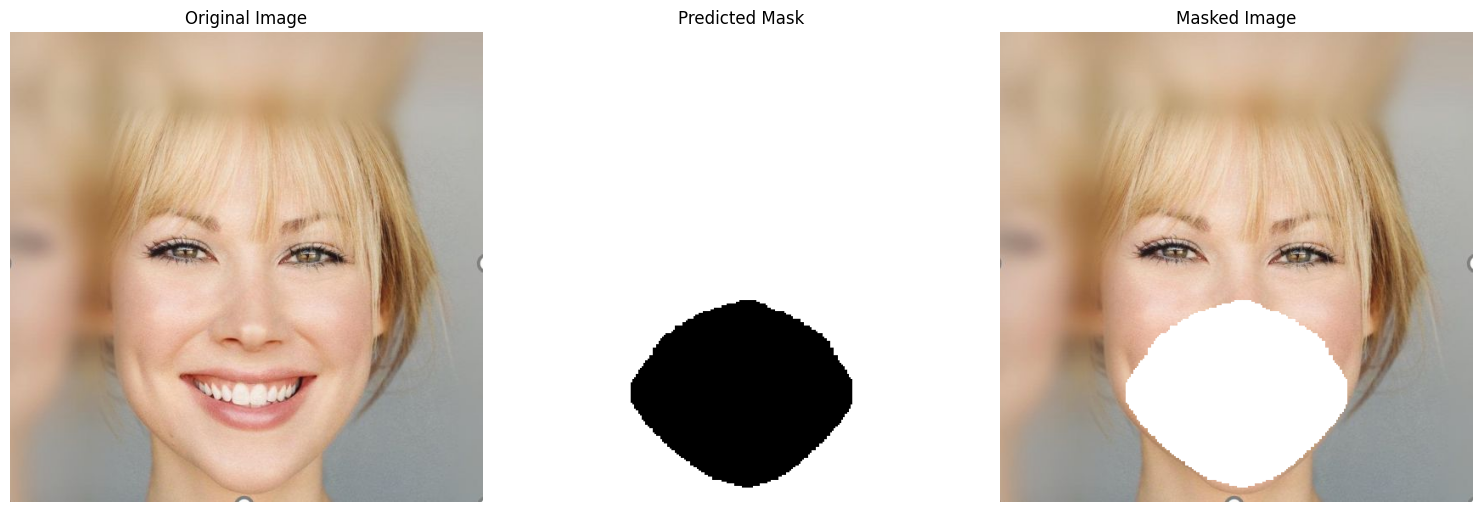

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import models
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image
import matplotlib.pyplot as plt

# Define TernausNet model (same architecture as in training)
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, middle_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(middle_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(middle_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(out_channels, out_channels, kernel_size=2, stride=2),
        )

    def forward(self, x):
        return self.block(x)

class TernausNet(nn.Module):
    def __init__(self, num_classes=1, pretrained=True):
        super(TernausNet, self).__init__()

        # Load VGG16 with pretrained weights as encoder
        vgg16 = models.vgg16(pretrained=pretrained)

        # Extract VGG16 encoder layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Encoder parts from VGG16
        self.encoder1 = nn.Sequential(vgg16.features[0], nn.ReLU(inplace=True),
                                     vgg16.features[2], nn.ReLU(inplace=True))

        self.encoder2 = nn.Sequential(vgg16.features[5], nn.ReLU(inplace=True),
                                     vgg16.features[7], nn.ReLU(inplace=True))

        self.encoder3 = nn.Sequential(vgg16.features[10], nn.ReLU(inplace=True),
                                     vgg16.features[12], nn.ReLU(inplace=True),
                                     vgg16.features[14], nn.ReLU(inplace=True))

        self.encoder4 = nn.Sequential(vgg16.features[17], nn.ReLU(inplace=True),
                                     vgg16.features[19], nn.ReLU(inplace=True),
                                     vgg16.features[21], nn.ReLU(inplace=True))

        self.encoder5 = nn.Sequential(vgg16.features[24], nn.ReLU(inplace=True),
                                     vgg16.features[26], nn.ReLU(inplace=True),
                                     vgg16.features[28], nn.ReLU(inplace=True))

        # Decoder parts
        self.center = DecoderBlock(512, 512, 256)

        self.decoder5 = DecoderBlock(256 + 512, 512, 256)
        self.decoder4 = DecoderBlock(256 + 512, 512, 256)
        self.decoder3 = DecoderBlock(256 + 256, 256, 128)
        self.decoder2 = DecoderBlock(128 + 128, 128, 64)
        self.decoder1 = DecoderBlock(64 + 64, 64, 32)

        # Final classifier
        self.final = nn.Conv2d(32, num_classes, kernel_size=1)

    def forward(self, x):
        input_size = x.size()

        # Encoder
        e1 = self.encoder1(x)
        e1_pool = self.pool(e1)

        e2 = self.encoder2(e1_pool)
        e2_pool = self.pool(e2)

        e3 = self.encoder3(e2_pool)
        e3_pool = self.pool(e3)

        e4 = self.encoder4(e3_pool)
        e4_pool = self.pool(e4)

        e5 = self.encoder5(e4_pool)
        e5_pool = self.pool(e5)

        # Center
        center = self.center(e5_pool)

        # Decoder with skip connections
        d5 = self.decoder5(torch.cat([center, e5], 1))
        d4 = self.decoder4(torch.cat([d5, e4], 1))
        d3 = self.decoder3(torch.cat([d4, e3], 1))
        d2 = self.decoder2(torch.cat([d3, e2], 1))
        d1 = self.decoder1(torch.cat([d2, e1], 1))

        # Final classifier
        final = self.final(d1)

        # Ensure output size matches input size by using interpolation
        if final.size() != (input_size[0], 1, input_size[2], input_size[3]):
            final = nn.functional.interpolate(
                final,
                size=(input_size[2], input_size[3]),
                mode='bilinear',
                align_corners=True
            )

        return final

def apply_mask_to_image(image_path, mask_path, output_path=None):
    """
    Apply the predicted mask to the original image by making the background transparent.

    Args:
        image_path: Path to the original image
        mask_path: Path to the predicted binary mask
        output_path: Path to save the masked image (optional)

    Returns:
        Masked image with transparent background
    """
    # Open original image and mask
    original = Image.open(image_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")

    # Resize mask to match original image if needed
    if original.size != mask.size:
        mask = mask.resize(original.size, Image.LANCZOS)

    # Create RGBA image (with alpha channel)
    result = original.copy().convert("RGBA")

    # Apply mask to the alpha channel
    data = result.getdata()
    mask_data = mask.getdata()

    new_data = []
    for i, item in enumerate(data):
        # If mask pixel is black (0), make the pixel transparent
        if mask_data[i] < 128:  # Using a threshold to determine foreground/background
            new_data.append((item[0], item[1], item[2], 0))  # Transparent
        else:
            new_data.append((item[0], item[1], item[2], 255))  # Opaque

    result.putdata(new_data)

    # Save the result if output_path is provided
    if output_path:
        result.save(output_path)

    return result

def predict_mask(model, image_path, output_mask_path=None, device="cuda"):
    """
    Predict mask for a given image using the trained model

    Args:
        model: Trained TernausNet model
        image_path: Path to the input image
        output_mask_path: Path to save the predicted mask (optional)
        device: Device to run inference on ("cuda" or "cpu")

    Returns:
        Predicted mask as numpy array
    """
    # Set model to evaluation mode
    model.eval()

    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")

    # Transform for inference
    transform = A.Compose([
        A.Resize(height=256, width=256),
        A.Normalize(
            mean=[0.485, 0.456, 0.406],  # ImageNet mean
            std=[0.229, 0.224, 0.225],   # ImageNet std
            max_pixel_value=255.0
        ),
        ToTensorV2(),
    ])

    # Convert PIL image to numpy array for albumentations
    image_np = np.array(image)
    transformed = transform(image=image_np)
    image_tensor = transformed["image"].unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        output = model(image_tensor)
        pred_mask = torch.sigmoid(output).squeeze().cpu().numpy()

    # Threshold the predicted mask
    binary_mask = (pred_mask > 0.5).astype(np.uint8) * 255

    # Resize mask back to original image size
    mask_pil = Image.fromarray(binary_mask)
    mask_pil = mask_pil.resize((image.width, image.height), Image.NEAREST)

    # Save mask if output path is provided
    if output_mask_path:
        mask_pil.save(output_mask_path)

    return np.array(mask_pil)

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load model
    model = TernausNet(num_classes=1, pretrained=False).to(device)

    # Load saved weights
    checkpoint = torch.load('/content/drive/MyDrive/best_ternausnet_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model loaded from epoch {checkpoint['epoch']} with loss {checkpoint['loss']}")

    # Path to input image
    input_image_path = "/content/input_image.jpg"  # Replace with your image path

    # Predict mask
    mask_path = "predicted_mask.png"
    predict_mask(model, input_image_path, mask_path, device)
    print(f"Mask saved to {mask_path}")

    # Apply mask to create transparent background
    output_image_path = "masked_output.png"
    apply_mask_to_image(input_image_path, mask_path, output_image_path)
    print(f"Masked image saved to {output_image_path}")

    # Display original, mask, and result
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    axes[0].imshow(Image.open(input_image_path))
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Predicted mask
    axes[1].imshow(Image.open(mask_path), cmap="gray")
    axes[1].set_title("Predicted Mask")
    axes[1].axis("off")

    # Masked image
    axes[2].imshow(Image.open(output_image_path))
    axes[2].set_title("Masked Image")
    axes[2].axis("off")

    plt.tight_layout()
    plt.savefig("result_comparison.png")
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
!git clone https://github.com/Rudrabha/Wav2Lip


Cloning into 'Wav2Lip'...
remote: Enumerating objects: 403, done.
remote: Total 403 (delta 0), reused 0 (delta 0), pack-reused 403 (from 1)
Receiving objects: 100% (403/403), 540.10 KiB | 2.40 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [ ]:
!pip install -r /content/Wav2Lip/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement opencv-python==4.1.0.25 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)

In [ ]:
!pip install torch torchvision tqdm opencv-python librosa scipy numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [ ]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [ ]:
# First, let's create the audio module
# Save this as audio.py
def create_audio_module():
    with open("audio.py", "w") as f:
        f.write("""
import librosa
import numpy as np
import torch
from scipy import signal

def load_wav(path, sr):
    return librosa.core.load(path, sr=sr)[0]

def save_wav(wav, path, sr):
    wav *= 32767 / max(0.01, np.max(np.abs(wav)))
    librosa.output.write_wav(path, wav.astype(np.int16), sr)

def get_hop_size(sr):
    hop_size = 256
    if sr >= 22050:
        hop_size = 1024
    return hop_size

def preemphasis(wav, k, preemphasize=True):
    if preemphasize:
        return signal.lfilter([1, -k], [1], wav)
    return wav

def load_mel(path):
    mel = np.load(path)
    return mel

def melspectrogram(wav, sr, n_fft, hop_size, win_size, n_mels):
    # Compute spectrogram
    spec = librosa.stft(
        wav, n_fft=n_fft, hop_length=hop_size, win_length=win_size)

    # Convert to mel-scale
    mel_basis = librosa.filters.mel(sr, n_fft, n_mels)
    mel = np.dot(mel_basis, np.abs(spec))

    # Convert to log scale
    mel = np.log(np.maximum(1e-5, mel))

    return mel

def load_mel_from_wav(wav_path, sr=16000, n_fft=800, hop_size=200, win_size=800, n_mels=80):
    wav = load_wav(wav_path, sr)
    hop_size = get_hop_size(sr)

    # Apply pre-emphasis
    wav = preemphasis(wav, 0.97)

    # Compute mel spectrogram
    mel = melspectrogram(wav, sr, n_fft, hop_size, win_size, n_mels)

    return mel

def load_mel(path):
    if path.endswith('.npy'):
        return np.load(path)
    elif path.endswith('.wav') or path.endswith('.mp3'):
        return load_mel_from_wav(path)
    else:
        raise ValueError(f"Unsupported file format: {path}")
""")

# Create a simple face detection module
# Save this as face_detection.py
def create_face_detection_module():
    with open("face_detection.py", "w") as f:
        f.write("""
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from enum import Enum

class LandmarksType(Enum):
    _2D = 1
    _3D = 2

class FaceAlignment:
    def __init__(self, landmarks_type, flip_input=False, device='cuda'):
        self.landmarks_type = landmarks_type
        self.flip_input = flip_input
        self.device = device

        # Load face detector
        self.face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def get_detections_for_batch(self, images):
        detections = []
        for image in images:
            # Convert to grayscale for face detection
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces
            faces = self.face_detector.detectMultiScale(gray, 1.1, 5)

            if len(faces) > 0:
                # Get the largest face
                x, y, w, h = sorted(faces, key=lambda f: f[2] * f[3], reverse=True)[0]
                detections.append((x, y, x + w, y + h))
            else:
                detections.append(None)

        return detections
""")

# Create the models module
# Save this as models.py
def create_models_module():
    with open("models.py", "w") as f:
        f.write("""
import torch
from torch import nn
from torch.nn import functional as F

class Conv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True):
        super(Conv2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class Wav2Lip(nn.Module):
    def __init__(self):
        super(Wav2Lip, self).__init__()

        self.face_encoder_blocks = nn.ModuleList([
            nn.Sequential(Conv2d(6, 16, kernel_size=7, stride=1, padding=3)),  # 96,96
            nn.Sequential(Conv2d(16, 32, kernel_size=3, stride=2, padding=1)),  # 48,48
            nn.Sequential(Conv2d(32, 32, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(32, 64, kernel_size=3, stride=2, padding=1)),  # 24,24
            nn.Sequential(Conv2d(64, 64, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(64, 128, kernel_size=3, stride=2, padding=1)),  # 12,12
            nn.Sequential(Conv2d(128, 128, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(128, 256, kernel_size=3, stride=2, padding=1)),  # 6,6
            nn.Sequential(Conv2d(256, 256, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(256, 512, kernel_size=3, stride=2, padding=1)),  # 3,3
            nn.Sequential(Conv2d(512, 512, kernel_size=3, stride=1, padding=1)),
        ])

        self.audio_encoder = nn.Sequential(
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1), padding=(1, 0)),

            Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1), padding=(1, 0)),

            Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1), padding=(1, 0)),

            Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=(3, 1), stride=(2, 1), padding=(1, 0)),

            Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        )

        self.face_decoder_blocks = nn.ModuleList([
            nn.Sequential(Conv2d(512, 512, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(1024, 512, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(1024, 512, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(768, 384, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(512, 256, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(384, 128, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(192, 96, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(128, 64, kernel_size=3, stride=1, padding=1)),
            nn.Sequential(Conv2d(80, 32, kernel_size=3, stride=1, padding=1))
        ])

        self.output_block = nn.Sequential(
            Conv2d(48, 32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(32, 3, kernel_size=1, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, audio_sequences, face_sequences):
        # Audio
        audio_sequences = audio_sequences.unsqueeze(1)
        audio_embedding = self.audio_encoder(audio_sequences)

        # Face
        x = face_sequences
        face_embedding = []
        for block in self.face_encoder_blocks:
            x = block(x)
            face_embedding.append(x)

        # Decoder
        x = face_embedding[-1]
        for i, block in enumerate(self.face_decoder_blocks):
            x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)

            # Skip connection
            try:
                x = torch.cat([x, face_embedding[-(i+2)]], dim=1)
            except:
                pass

            x = block(x)

        # Skip connection from input
        x = torch.cat([x, face_sequences[:, 3:]], dim=1)

        x = self.output_block(x)

        return x
""")

# Main script for Wave2Lip
import os
import numpy as np
import cv2
import torch
import subprocess
from tqdm import tqdm
from os.path import dirname, join, basename, isfile

# Create the necessary modules first
create_audio_module()
create_face_detection_module()
create_models_module()

# Now import them
import audio
import face_detection
from models import Wav2Lip

def download_pretrained_model():
    """Download the pretrained Wave2Lip model"""
    os.makedirs('checkpoints', exist_ok=True)

    # Check if model already exists
    if os.path.isfile('checkpoints/wav2lip_gan.pth'):
        print("Pretrained model already exists")
        return

    print("Downloading pretrained model...")
    # You would normally download using wget/requests here
    # For this example, we'll just notify the user
    print("Please download the pretrained model from: https://github.com/Rudrabha/Wav2Lip#getting-the-weights")
    print("And place it in the checkpoints directory as 'wav2lip_gan.pth'")

def get_smoothened_boxes(boxes, T):
    """Smoothen the bounding boxes across frames"""
    for i in range(len(boxes)):
        if i + T > len(boxes):
            window = boxes[len(boxes) - T:]
        else:
            window = boxes[i : i + T]

        boxes[i] = np.mean(window, axis=0)
    return boxes

def face_detect(images, detector):
    """Detect faces in each frame and return bounding boxes"""
    batch_size = 16

    while batch_size > 0:
        predictions = []
        try:
            for i in tqdm(range(0, len(images), batch_size)):
                predictions.extend(detector.get_detections_for_batch(np.array(images[i:i + batch_size])))
            break
        except RuntimeError:
            batch_size //= 2

    results = []
    pady1, pady2, padx1, padx2 = 10, 10, 10, 10

    for rect, image in zip(predictions, images):
        if rect is None:
            continue

        y1 = max(0, rect[1] - pady1)
        y2 = min(image.shape[0], rect[3] + pady2)
        x1 = max(0, rect[0] - padx1)
        x2 = min(image.shape[1], rect[2] + padx2)

        results.append([x1, y1, x2, y2])

    boxes = np.array(results)
    if len(boxes) == 0:
        return []

    boxes = get_smoothened_boxes(boxes, T=5)
    results = [[b[0], b[1], b[2], b[3]] for b in boxes]

    return results

def datagen(frames, mels, face_det_results, box):
    """Generate data for Wave2Lip model"""
    img_batch, mel_batch = [], []

    face_det_results = face_det_results or [None] * len(frames)
    for i, m in enumerate(mels):
        idx = i % len(frames)
        frame = frames[idx].copy()
        face = None

        if box is not None:
            x1, y1, x2, y2 = box
            face = frame[y1:y2, x1:x2]
        elif face_det_results[idx] is not None:
            x1, y1, x2, y2 = face_det_results[idx]
            face = frame[y1:y2, x1:x2]

        if face is None:
            continue

        face = cv2.resize(face, (96, 96))
        img_batch.append(face)
        mel_batch.append(m)

    if len(img_batch) == 0:
        return None, None, None

    img_batch = np.asarray(img_batch)
    mel_batch = np.asarray(mel_batch)

    img_masked = img_batch.copy()
    img_masked[:, 96//2:] = 0

    return img_batch, img_masked, mel_batch

def load_model(checkpoint_path, device):
    """Load the Wave2Lip model"""
    model = Wav2Lip()
    print(f"Loading model from {checkpoint_path}")

    if not os.path.isfile(checkpoint_path):
        print(f"{checkpoint_path} does not exist. Please download the pretrained model.")
        return None

    checkpoint = torch.load(checkpoint_path, map_location=device)

    s = checkpoint["state_dict"] if "state_dict" in checkpoint else checkpoint
    new_s = {}
    for k, v in s.items():
        new_s[k.replace('module.', '')] = v
    model.load_state_dict(new_s)
    model = model.to(device)
    model.eval()
    return model

def process_video(input_video, input_audio, output_path, checkpoint_path="checkpoints/wav2lip_gan.pth"):
    """Process video with Wave2Lip"""
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print('Using {} for inference.'.format(device))

    # Load model
    model = load_model(checkpoint_path, device)
    if model is None:
        return

    # Create a temporary directory for processing
    temp_dir = 'temp'
    os.makedirs(temp_dir, exist_ok=True)

    # Check if input files exist
    if not os.path.isfile(input_video):
        print(f"Input video file {input_video} does not exist.")
        return

    if input_audio is not None and not os.path.isfile(input_audio):
        print(f"Input audio file {input_audio} does not exist.")
        return

    # Extract audio from input video if not provided
    if input_audio is None:
        input_audio = os.path.join(temp_dir, 'extracted_audio.wav')
        command = f"ffmpeg -y -i {input_video} -strict -2 {input_audio}"
        subprocess.call(command, shell=True)

    # Read video
    video_stream = cv2.VideoCapture(input_video)
    fps = video_stream.get(cv2.CAP_PROP_FPS)
    frame_width = int(video_stream.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_stream.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Read frames
    print("Reading video frames...")
    frames = []
    while True:
        ret, frame = video_stream.read()
        if not ret:
            break
        frames.append(frame)
    print(f"Read {len(frames)} frames")

    # Initialize face detector
    detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D,
                                           flip_input=False, device=device)

    # Detect faces in the video
    print("Detecting faces...")
    face_det_results = face_detect(frames, detector)

    if len(face_det_results) == 0:
        print("No face detected in the video")
        return

    print("Processing audio...")
    try:
        # Extract audio features (mel spectrograms)
        mel_step_size = 16
        wav = audio.load_wav(input_audio, 16000)
        mel = audio.melspectrogram(wav, 16000, n_fft=800, hop_size=200, win_size=800, n_mels=80)
        print(f"Mel shape: {mel.shape}")

        # Chunk up the mel spectrogram
        mel_chunks = []
        mel_idx_multiplier = 80./fps
        i = 0
        while 1:
            start_idx = int(i * mel_idx_multiplier)
            if start_idx + mel_step_size > len(mel[0]):
                break
            mel_chunks.append(mel[:, start_idx:start_idx + mel_step_size])
            i += 1
    except Exception as e:
        print(f"Error processing audio: {e}")
        return

    print("Processing video...")
    # Set up output video writer
    out = cv2.VideoWriter(os.path.join(temp_dir, 'result.avi'),
                          cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame_width, frame_height))

    # Process each frame
    for i, m in tqdm(enumerate(mel_chunks)):
        if i >= len(frames):
            break

        frame_to_save = frames[i].copy()

        # Make sure we have face detection results for this frame
        face_idx = min(i, len(face_det_results) - 1) if face_det_results else None
        face_rect = face_det_results[face_idx] if face_idx is not None else None

        img_batch, img_masked, mel_batch = datagen([frames[i]], [m], [face_rect], None)

        if img_batch is None or img_batch.size == 0:
            out.write(frame_to_save)
            continue

        # Convert to PyTorch tensors
        img_batch = torch.FloatTensor(np.transpose(img_batch, (0, 3, 1, 2))).to(device) / 255.
        img_masked = torch.FloatTensor(np.transpose(img_masked, (0, 3, 1, 2))).to(device) / 255.
        mel_batch = torch.FloatTensor(np.transpose(mel_batch, (0, 3, 1, 2))).to(device)

        with torch.no_grad():
            pred = model(mel_batch, img_masked)

        pred = pred.cpu().numpy().transpose(0, 2, 3, 1) * 255.

        # Overlay the predicted face onto the original frame
        if face_rect is not None:
            x1, y1, x2, y2 = face_rect
            face_pred = cv2.resize(pred[0].astype(np.uint8), (x2 - x1, y2 - y1))
            frame_to_save[y1:y2, x1:x2] = face_pred

        out.write(frame_to_save)

    out.release()

    # Merge audio with the output video
    try:
        command = f"ffmpeg -y -i {os.path.join(temp_dir, 'result.avi')} -i {input_audio} -strict -2 -q:v 1 {output_path}"
        subprocess.call(command, shell=True)
        print(f"Video saved to {output_path}")
    except Exception as e:
        print(f"Error merging audio with video: {e}")

def main():
    # Download pretrained model
    download_pretrained_model()

    # Example usage
    input_video = "/content/Wav2Lip/Unplugged ft. Arvind Kejriwal ｜ Biggest Podcast Before Delhi Elections｜ AAP VS BJP｜ Rahul Gandhi｜.mp4"  # Your masked video
    input_audio = "/content/drive/MyDrive/input/tinywow_Untitled video - Made with Clipchamp_77203162.wav"       # Audio to sync with
    output_path = "output_synced_video.mp4"

    # Check if files exist
    if not os.path.isfile(input_video):
        print(f"Input video file {input_video} does not exist.")
        print("Please specify correct paths to your input files.")
        return

    if not os.path.isfile(input_audio):
        print(f"Input audio file {input_audio} does not exist.")
        print("Using audio from the input video.")
        input_audio = None

    # Process the video
    process_video(input_video, input_audio, output_path)

if __name__ == "__main__":
    main()

Pretrained model already exists
Using cpu for inference.
Loading model from checkpoints/wav2lip_gan.pth
Reading video frames...


In [ ]:
!pip install yt_dlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.0 MB/s eta 0:00:00


In [ ]:

import yt_dlp

# Define the URL of the video you want to download
video_url = 'https://www.youtube.com/watch?v=FlFg68A6TwU&t'

# Set up options for yt-dlp (optional)
ydl_opts = {
    'format': 'best',  # Download the best quality available
    'outtmpl': '%(title)s.%(ext)s',  # Output file template
    'noplaylist': True,  # Avoid downloading playlists if URL points to one
}

# Create a yt-dlp object and download the video
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

print("Video downloaded successfully!")

[youtube] Extracting URL: https://www.youtube.com/watch?v=FlFg68A6TwU&t
[youtube] FlFg68A6TwU: Downloading webpage
[youtube] FlFg68A6TwU: Downloading tv client config
[youtube] FlFg68A6TwU: Downloading player 73381ccc-main
[youtube] FlFg68A6TwU: Downloading tv player API JSON
[youtube] FlFg68A6TwU: Downloading ios player API JSON
[youtube] FlFg68A6TwU: Downloading m3u8 information
[info] FlFg68A6TwU: Downloading 1 format(s): 18
[download] Destination: Unplugged ft. Arvind Kejriwal ｜ Biggest Podcast Before Delhi Elections｜ AAP VS BJP｜ Rahul Gandhi｜.mp4
[download] 100% of  232.40MiB in 00:01:12 at 3.22MiB/s   
Video downloaded successfully!
